In [1]:
from utils.tools import DotDict,create_logger

from utils.data import build_corpus,extend_maps, append_end_token
from solver import NER_BiLSTM_CRF_Solver

import matplotlib.pyplot as plt

In [2]:
args=DotDict()
args.log_file='logs/ner_bilstm_crf.log'
args.data_dir='data/ResumeNER'

args.model_config=DotDict()
model_config=args.model_config

model_config.batch_size = 64
model_config.lr = 0.001
model_config.epochs = 30
model_config.checkpoint_dir='checkpoints/'

model_config.emb_size = 128
model_config.hidden_size = 128

In [3]:
logger=create_logger(args.log_file)

In [4]:
train_word_lists, train_tag_lists, word2id, tag2id = \
    build_corpus("train",data_dir=args.data_dir)
dev_word_lists, dev_tag_lists = build_corpus("dev", make_vocab=False,data_dir=args.data_dir)
test_word_lists, test_tag_lists = build_corpus("test", make_vocab=False,data_dir=args.data_dir)


# 如果是加了CRF的lstm还要加入<start>和<end> (解码的时候需要用到)
crf_word2id, crf_tag2id = extend_maps(word2id, tag2id, for_crf=True)
# 还需要额外的一些数据处理
train_word_lists, train_tag_lists = append_end_token(
    train_word_lists, train_tag_lists
)
dev_word_lists, dev_tag_lists = append_end_token(
    dev_word_lists, dev_tag_lists
)
test_word_lists, test_tag_lists = append_end_token(
    test_word_lists, test_tag_lists, test=True
)

ner_solver=NER_BiLSTM_CRF_Solver(model_config)
trian_metrics,val_metrics = ner_solver.train_and_eval(
    (train_word_lists, train_tag_lists),
    (dev_word_lists, dev_tag_lists),
    (test_word_lists, test_tag_lists),
    crf_word2id, crf_tag2id
)

  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:19:41 - 0:00:06 - Epoch 1, train loss: 72.5035 val loss: 27.5465


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:19:45 - 0:00:11 - Epoch 2, train loss: 25.8207 val loss: 14.7584


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:19:50 - 0:00:16 - Epoch 3, train loss: 13.8369 val loss: 9.4428


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:19:55 - 0:00:21 - Epoch 4, train loss: 8.7887 val loss: 7.0737


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:00 - 0:00:26 - Epoch 5, train loss: 6.3374 val loss: 5.8857


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:05 - 0:00:31 - Epoch 6, train loss: 4.9140 val loss: 5.1621


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:10 - 0:00:35 - Epoch 7, train loss: 3.9151 val loss: 4.5989


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:14 - 0:00:40 - Epoch 8, train loss: 3.1786 val loss: 4.2588


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:19 - 0:00:45 - Epoch 9, train loss: 2.6196 val loss: 4.0976


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:24 - 0:00:50 - Epoch 10, train loss: 2.2415 val loss: 4.1339


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:29 - 0:00:54 - Epoch 11, train loss: 2.0008 val loss: 4.0906


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:33 - 0:00:59 - Epoch 12, train loss: 1.8406 val loss: 3.5832


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:38 - 0:01:04 - Epoch 13, train loss: 1.4616 val loss: 3.7485


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:43 - 0:01:09 - Epoch 14, train loss: 1.2446 val loss: 3.6818


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:48 - 0:01:13 - Epoch 15, train loss: 1.0901 val loss: 3.9478


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:52 - 0:01:18 - Epoch 16, train loss: 1.0070 val loss: 3.6049


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:20:57 - 0:01:23 - Epoch 17, train loss: 0.8959 val loss: 3.6127


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:02 - 0:01:28 - Epoch 18, train loss: 0.7632 val loss: 3.6647


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:06 - 0:01:32 - Epoch 19, train loss: 0.6780 val loss: 4.0623


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:11 - 0:01:37 - Epoch 20, train loss: 0.5619 val loss: 3.7324


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:16 - 0:01:42 - Epoch 21, train loss: 0.5108 val loss: 3.6255


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:21 - 0:01:47 - Epoch 22, train loss: 0.4167 val loss: 3.7183


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:26 - 0:01:51 - Epoch 23, train loss: 0.3606 val loss: 3.7628


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:30 - 0:01:56 - Epoch 24, train loss: 0.3159 val loss: 3.7392


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:35 - 0:02:01 - Epoch 25, train loss: 0.2764 val loss: 3.7459


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:40 - 0:02:06 - Epoch 26, train loss: 0.2462 val loss: 3.7853


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:45 - 0:02:11 - Epoch 27, train loss: 0.2189 val loss: 3.8336


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:50 - 0:02:16 - Epoch 28, train loss: 0.1958 val loss: 3.8817


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:55 - 0:02:20 - Epoch 29, train loss: 0.1744 val loss: 3.9152


  0%|          | 0/60 [00:00<?, ?it/s]

INFO - 06/15/21 15:21:59 - 0:02:25 - Epoch 30, train loss: 0.1567 val loss: 3.9480
INFO - 06/15/21 15:21:59 - 0:02:25 - 评估bilstm_crf模型中...
INFO - 06/15/21 15:21:59 - 0:02:25 - Model has been saved to checkpoints/bilstm_crf.pth
D:\anaconda3\envs\pt\lib\site-packages\torch\nn\modules\rnn.py:584: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  ..\aten\src\ATen\native\cudnn\RNN.cpp:775.)
  result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
           precision    recall  f1-score   support
   B-CONT     1.0000    1.0000    1.0000        28
  M-TITLE     0.9423    0.8840    0.9122      1922
  E-TITLE     0.9882    0.9793    0.9837       772
   E-CONT     1.0000    1.0000    1.0000        28
    E-ORG     0.9271    0.8969    0.9118       553
    E-EDU     0.9818    0

Text(0.5, 1.0, 'bilstm+crf loss')

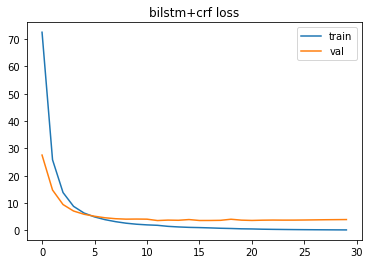

In [5]:
epochs=list(range(model_config.epochs))
plt.plot(epochs,trian_metrics,label='train')
plt.plot(epochs,val_metrics,label='val')
plt.legend()
plt.title('bilstm+crf loss')